# Классификация клиентов банка - прогнозирование оттока

## Исследование оттока клиентов банка

Основная задача: 
1. Первичный анализ данных
2. Предварительная обработка данных

Подключение необходимых библиотек для прогнозирования оттока клиентов банка 
(также для дальнейшего обучения моделей с помощью метрик классификаций и определения лучшей модели):

In [70]:
import numpy as np #массивы и линейная алгебра
import pandas as pd #обработка данных таблицы

import matplotlib.pyplot as plt
import seaborn as sns #для визуализации (графики, диаграммы)

### Загрузка данных

In [71]:
# загружаем данные, указываем символ-разделитель
df = pd.read_csv('Churn_Modelling.csv', sep = ';')

In [72]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Описание данных

Признаки:
- RowNumber – индекс строки в данных
- CustomerId – уникальный идентификатор клиента
- Surname – фамилия
- CreditScore – кредитный рейтинг
- Geography – страна проживания
- Gender – пол
- Age – возраст
- Tenure – количество недвижимости у клиента
- Balance – баланс на счёте
- NumOfProducts -количество продуктов банка, используемых клиентом
- HasCrCard – наличие кредитной карты
- IsActiveMember – активность клиента
- EstimatedSalary – предполагаемая зарплата

Целевой (искомый) признак:
- Exited – факт ухода клиента

## Просмотр общей информации о датафрейме и его первичный анализ данных

### Разведочный анализ данных (EDA) или первичный анализ нужен для понимания всего датафрейма, включая:

 - понимание присутствующих данных (их типы, структура и тд)
 - выявление закономерностей, влияние признаков друг на друга (корелляция)
 - обнаружение и анализ возможных выбросов - аномальных значений
 - обнаружение и анализ пропущенных/ошибочных/нулевых значений


In [73]:
df.shape

(10000, 14)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Количество строк и столбцов - 10000, 14 (объектов и признаков)

Наличие пропущенных значений - нет (в каждом столбце по 10000 наблюдений)

Все типы данных, которые встречаются в датасете - float64(2), int64(9), object(3)

In [75]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Названия всех столбцов

In [76]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%0.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


In [77]:
df.describe(include=[object]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


###### Вывод информации для количественных и категориальных признаков, по которой можно определить:
    - Кол-во непустых значений (count)
    - Среднее значение (mean)
    - Стандартное отклонение (std)
    - Минимальное/максимальное значение (min/max)
    - Медиана (50%)
    - Нижний/верхний квартили (25%/75%)
##### В категориальных:
    - Кол-во уникальных значений (unique)
    - Часто встречаемое значение (top)
    - Частота появления часто встречаемого значения (freq)

In [78]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [79]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Отсутствующих значений в колонках нет

<Axes: ylabel='proportion'>

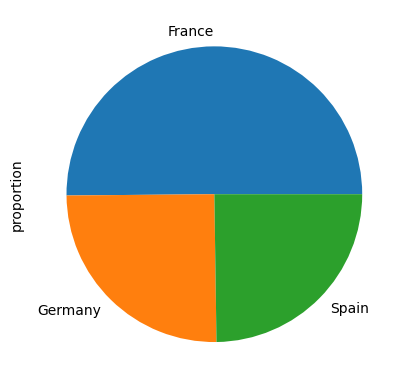

In [80]:
df['Geography'].value_counts(normalize=True).plot.pie()

Диаграмма со странами

<Axes: ylabel='proportion'>

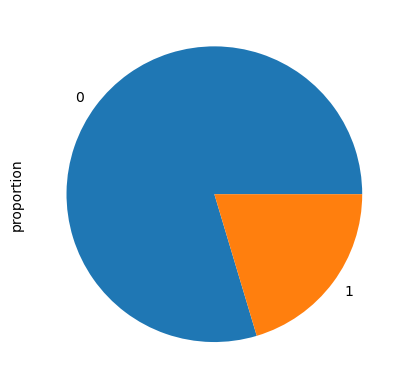

In [81]:
df['Exited'].value_counts(normalize=True).plot.pie()

Диаграмма с уходом клиентов

In [82]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Кол-во мужчин и женщин

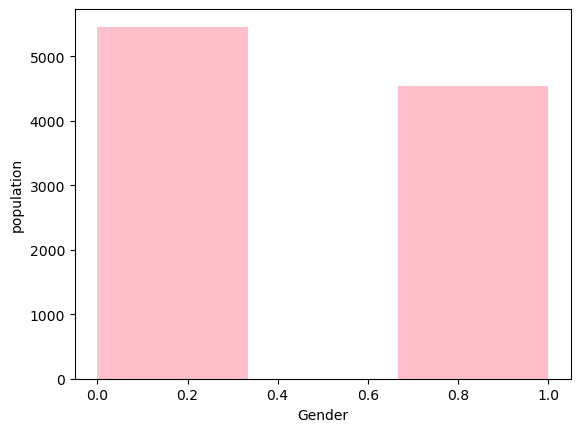

In [109]:
plt.hist(x = df.Gender, bins = 3, color = 'pink')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

Визуализация кол-ва мужчин и женщин

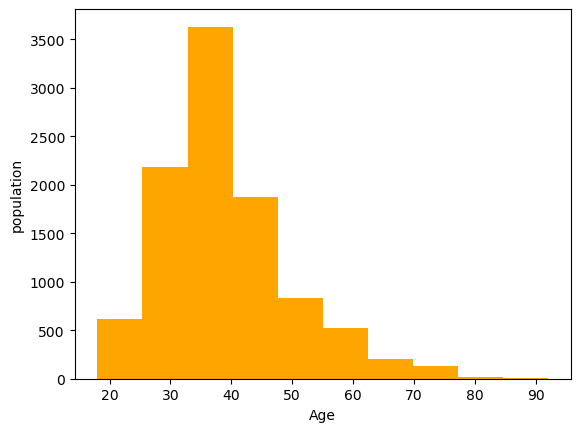

In [113]:
plt.hist(x = df.Age, bins = 10, color = 'orange')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

Гистограмма для количества людей с определенным возрастом

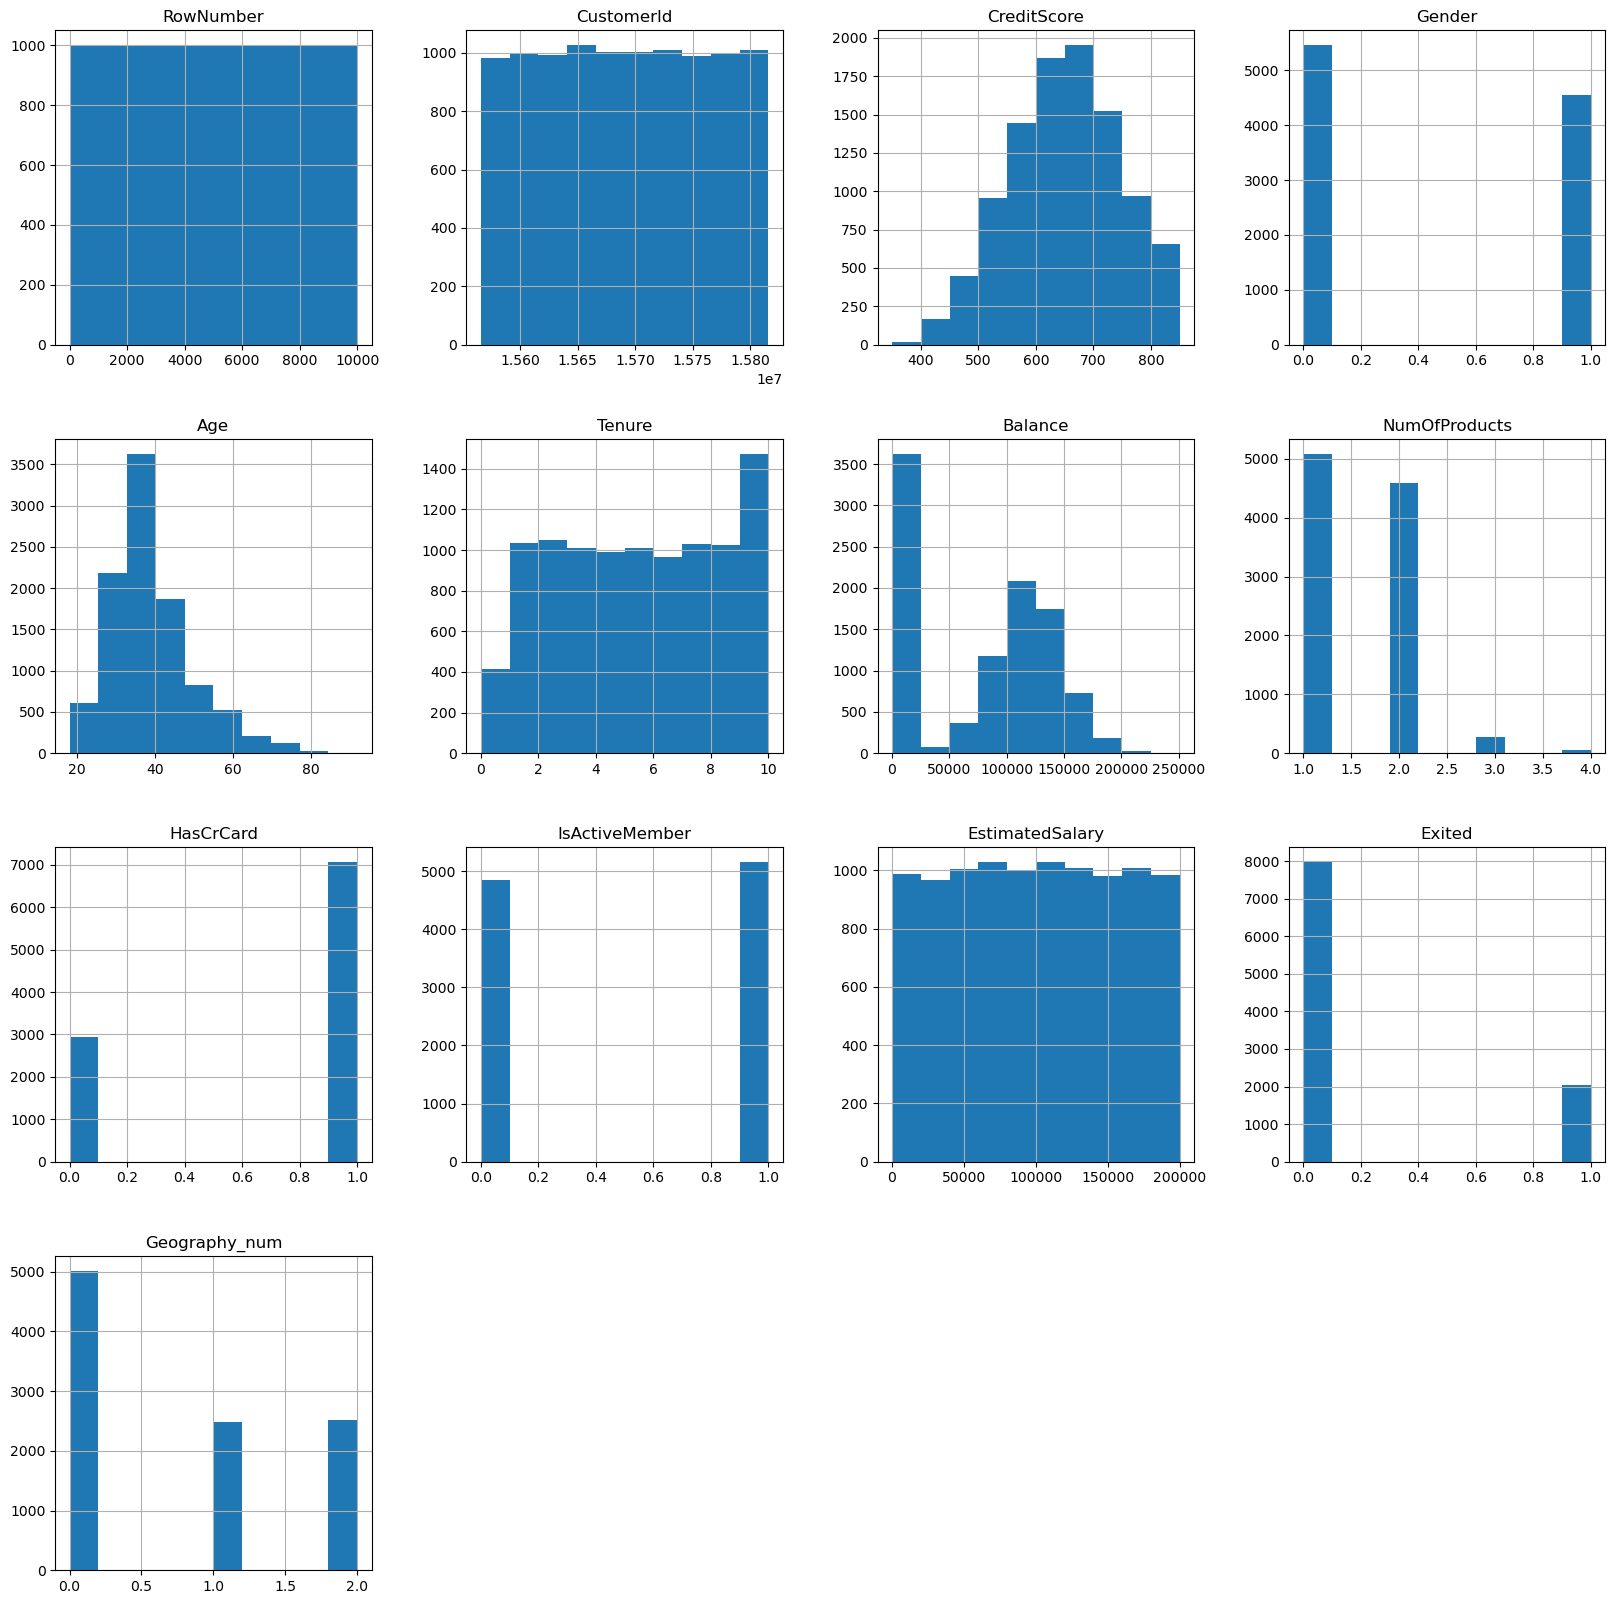

In [111]:
df.hist(figsize=(20,20));

Гистограмма для всех признаков

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


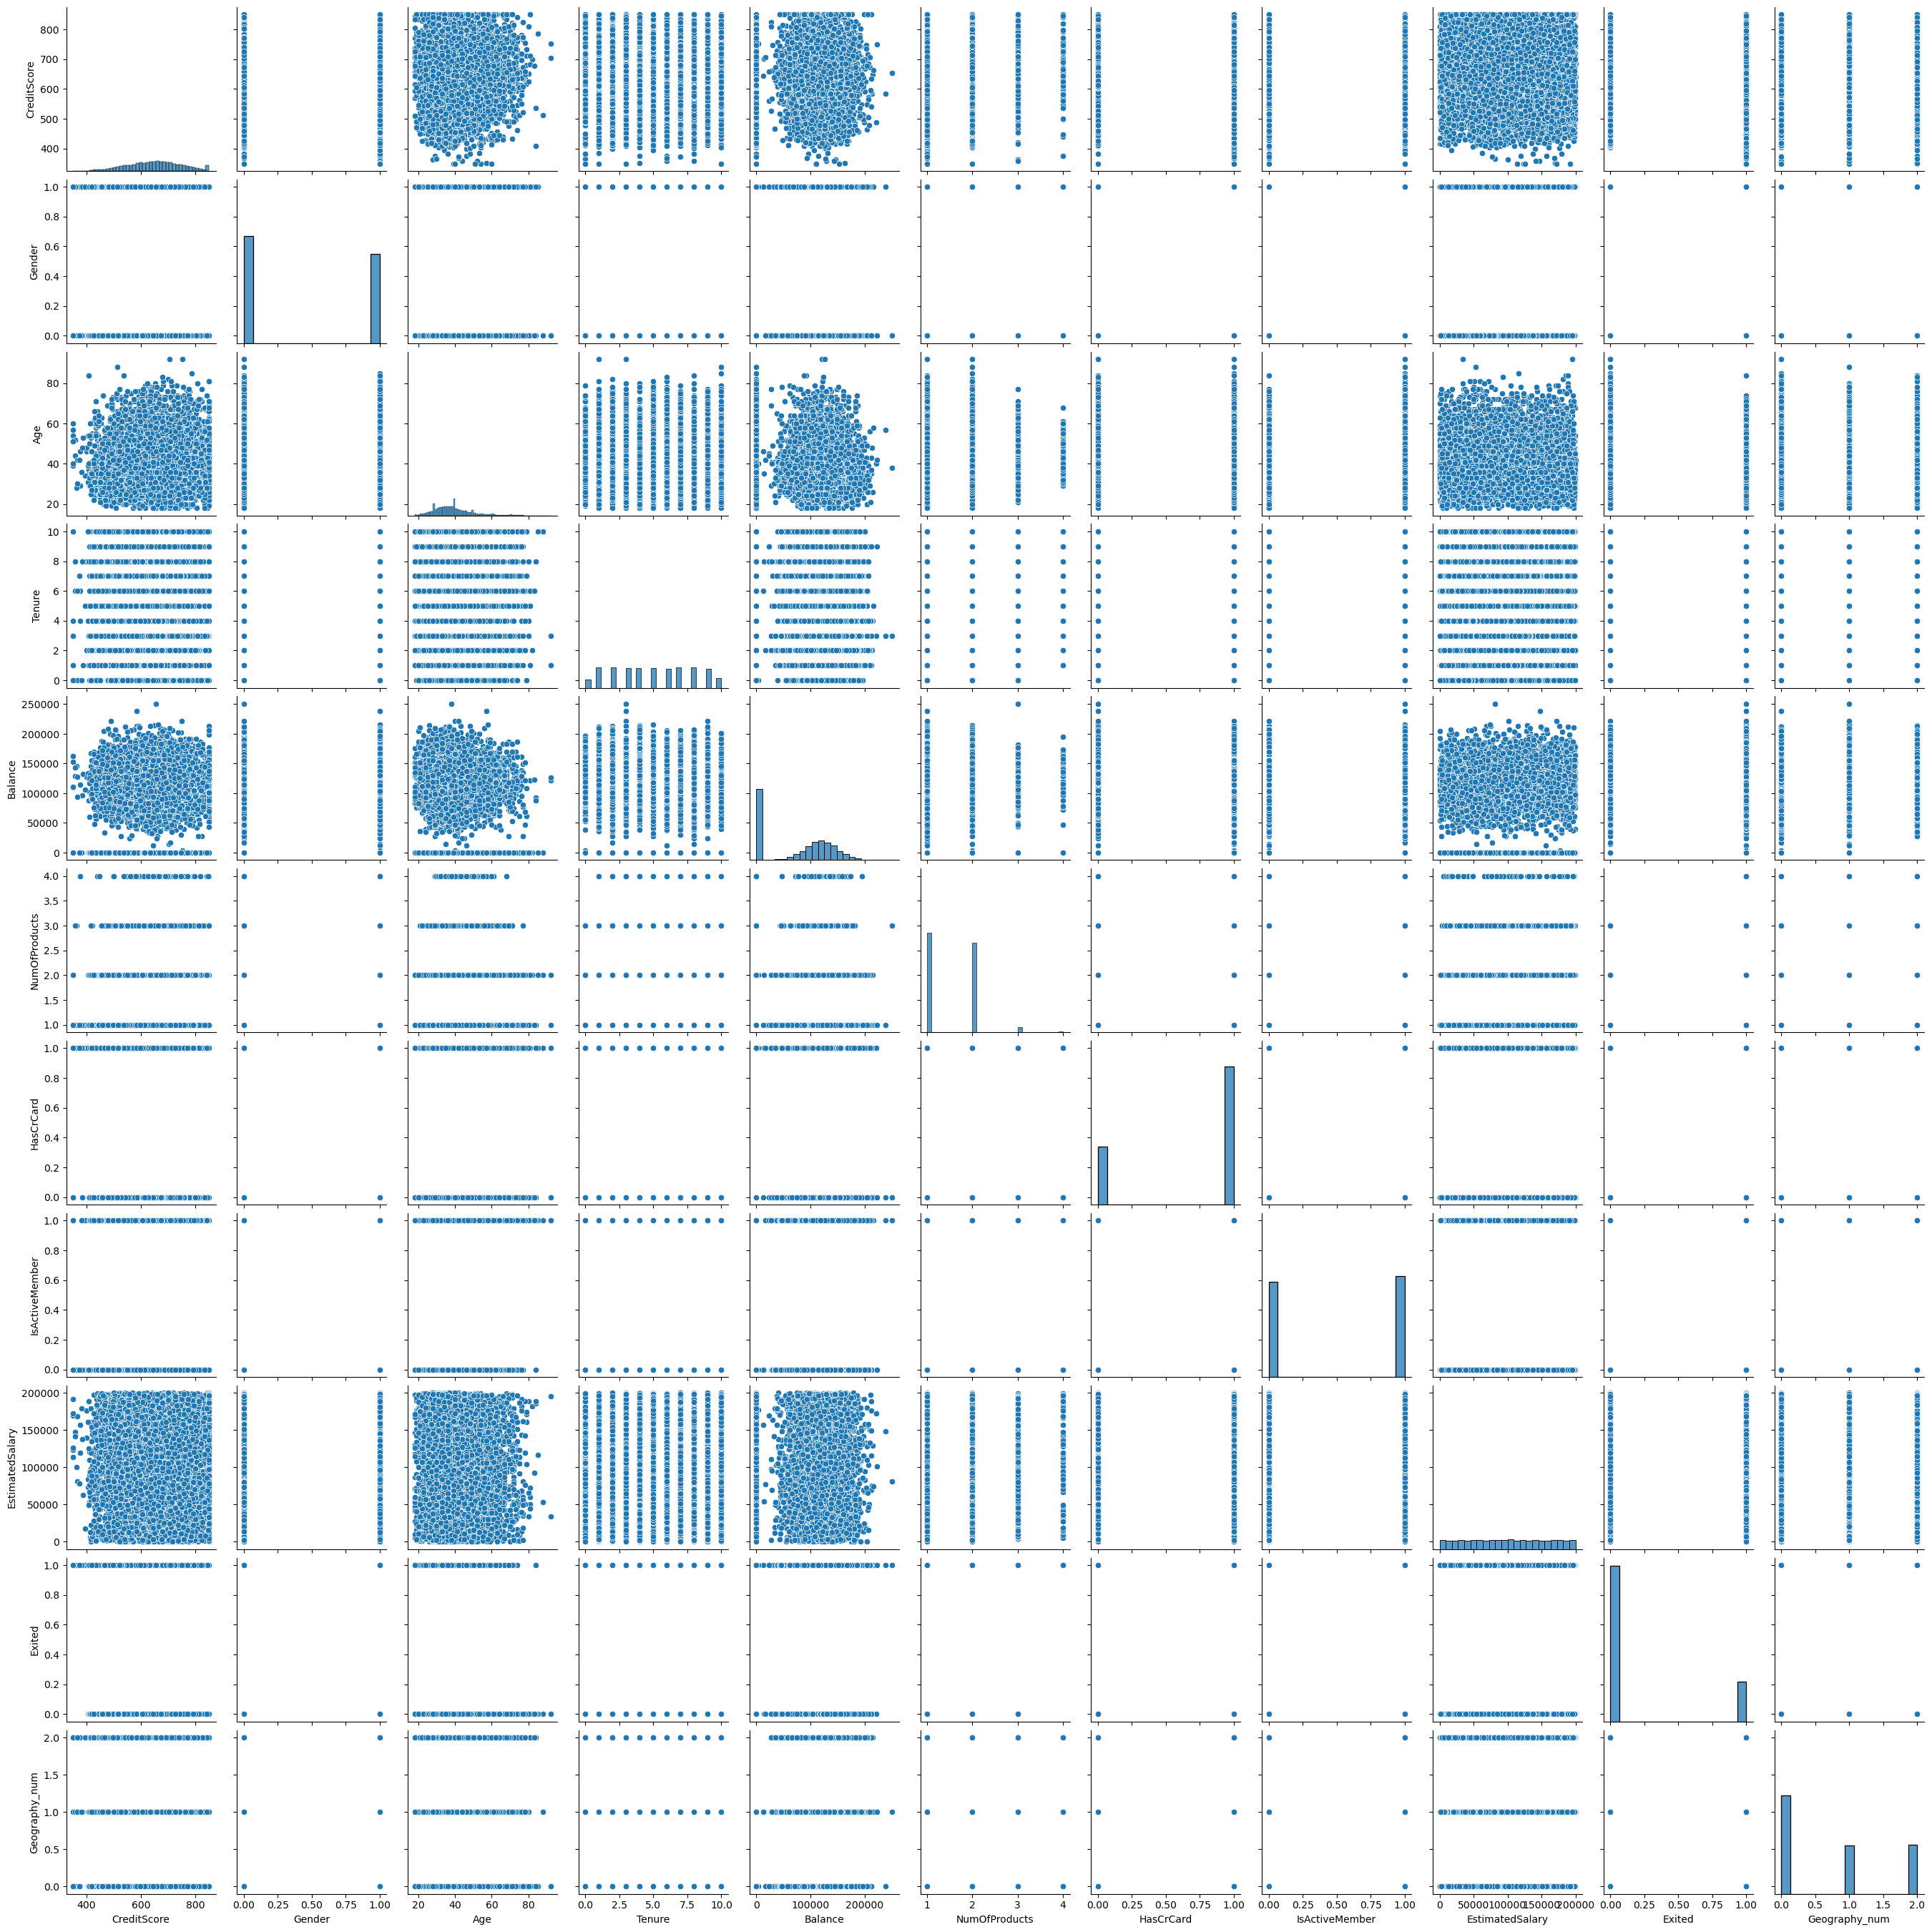

In [114]:
sns.pairplot(df[features_eda])

Для обнаружений взаимосвязи между признаками и выявление аномальных выбросов

<Axes: >

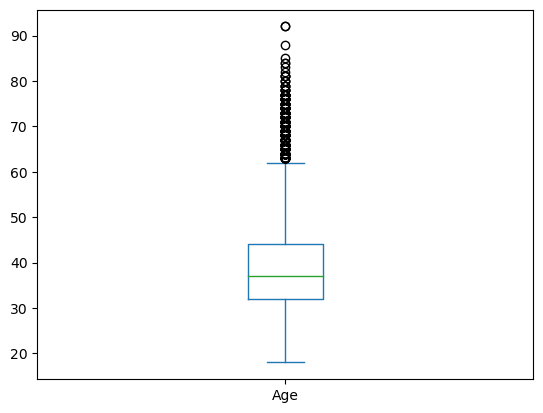

In [112]:
# "ящик с усами" (boxplot) для визуализации распределения вероятностей значений признака
df['Age'].plot.box()

<Axes: ylabel='Density'>

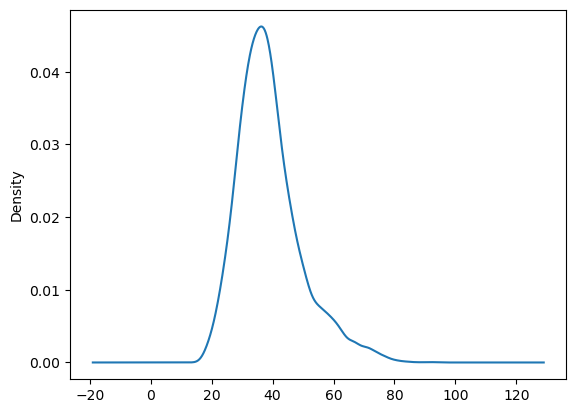

In [87]:
# график плотности распределения признака
df['Age'].plot.density()

In [88]:
# создание новой колонки Geography_num и замена символьных значений на целочисленные
df['Geography_num'] = df['Geography']

country = {'France':0, 'Spain':1, 'Germany':2}
df['Geography_num'] = df['Geography_num'].map(country)

In [89]:
gender = {'Male':0, 'Female':1}
df['Gender']= df['Gender'].map(gender)

In [90]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [91]:
df['Geography_num'].unique()

array([0, 1, 2], dtype=int64)

In [92]:
# список признаков для анализа
features_eda = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']

<Axes: >

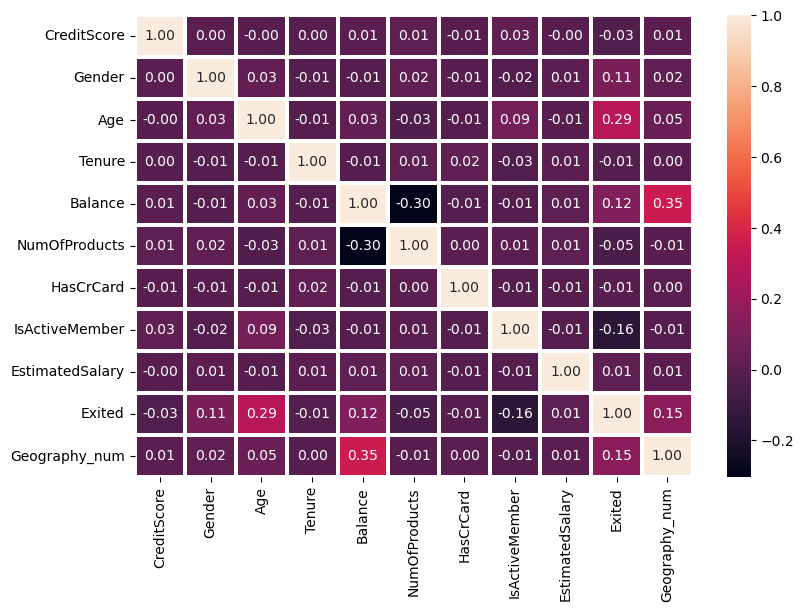

In [93]:
# тепловая карта корреляций между признаками
corr = df[features_eda].corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

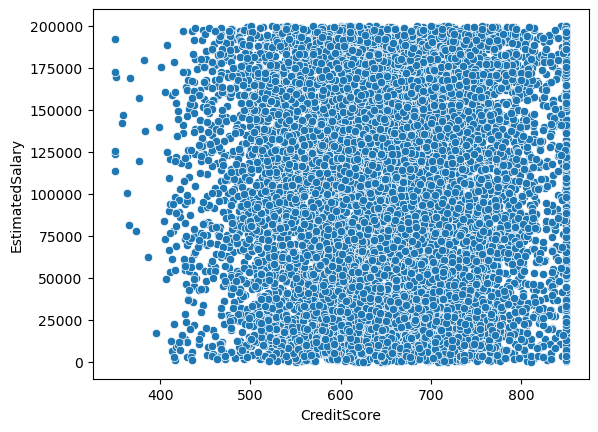

In [94]:
# диаграмма рассеяния для 2х признаков средствами библиотеки seaborn 
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary")

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

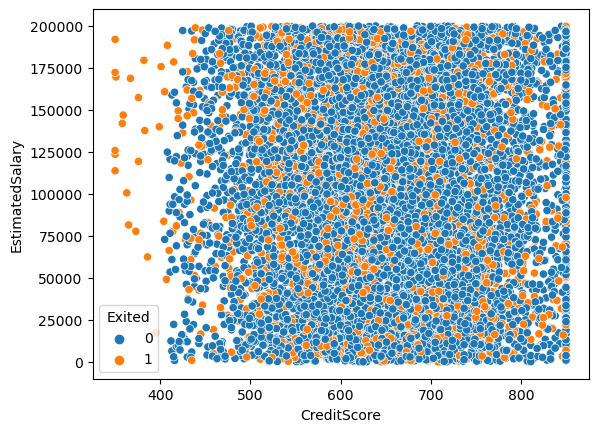

In [95]:
# цвета точек зависят от класса объекта (ушёл клиент или нет)
sns.scatterplot(data=df, x="CreditScore", y="EstimatedSalary", hue="Exited") # , style="Exited"

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


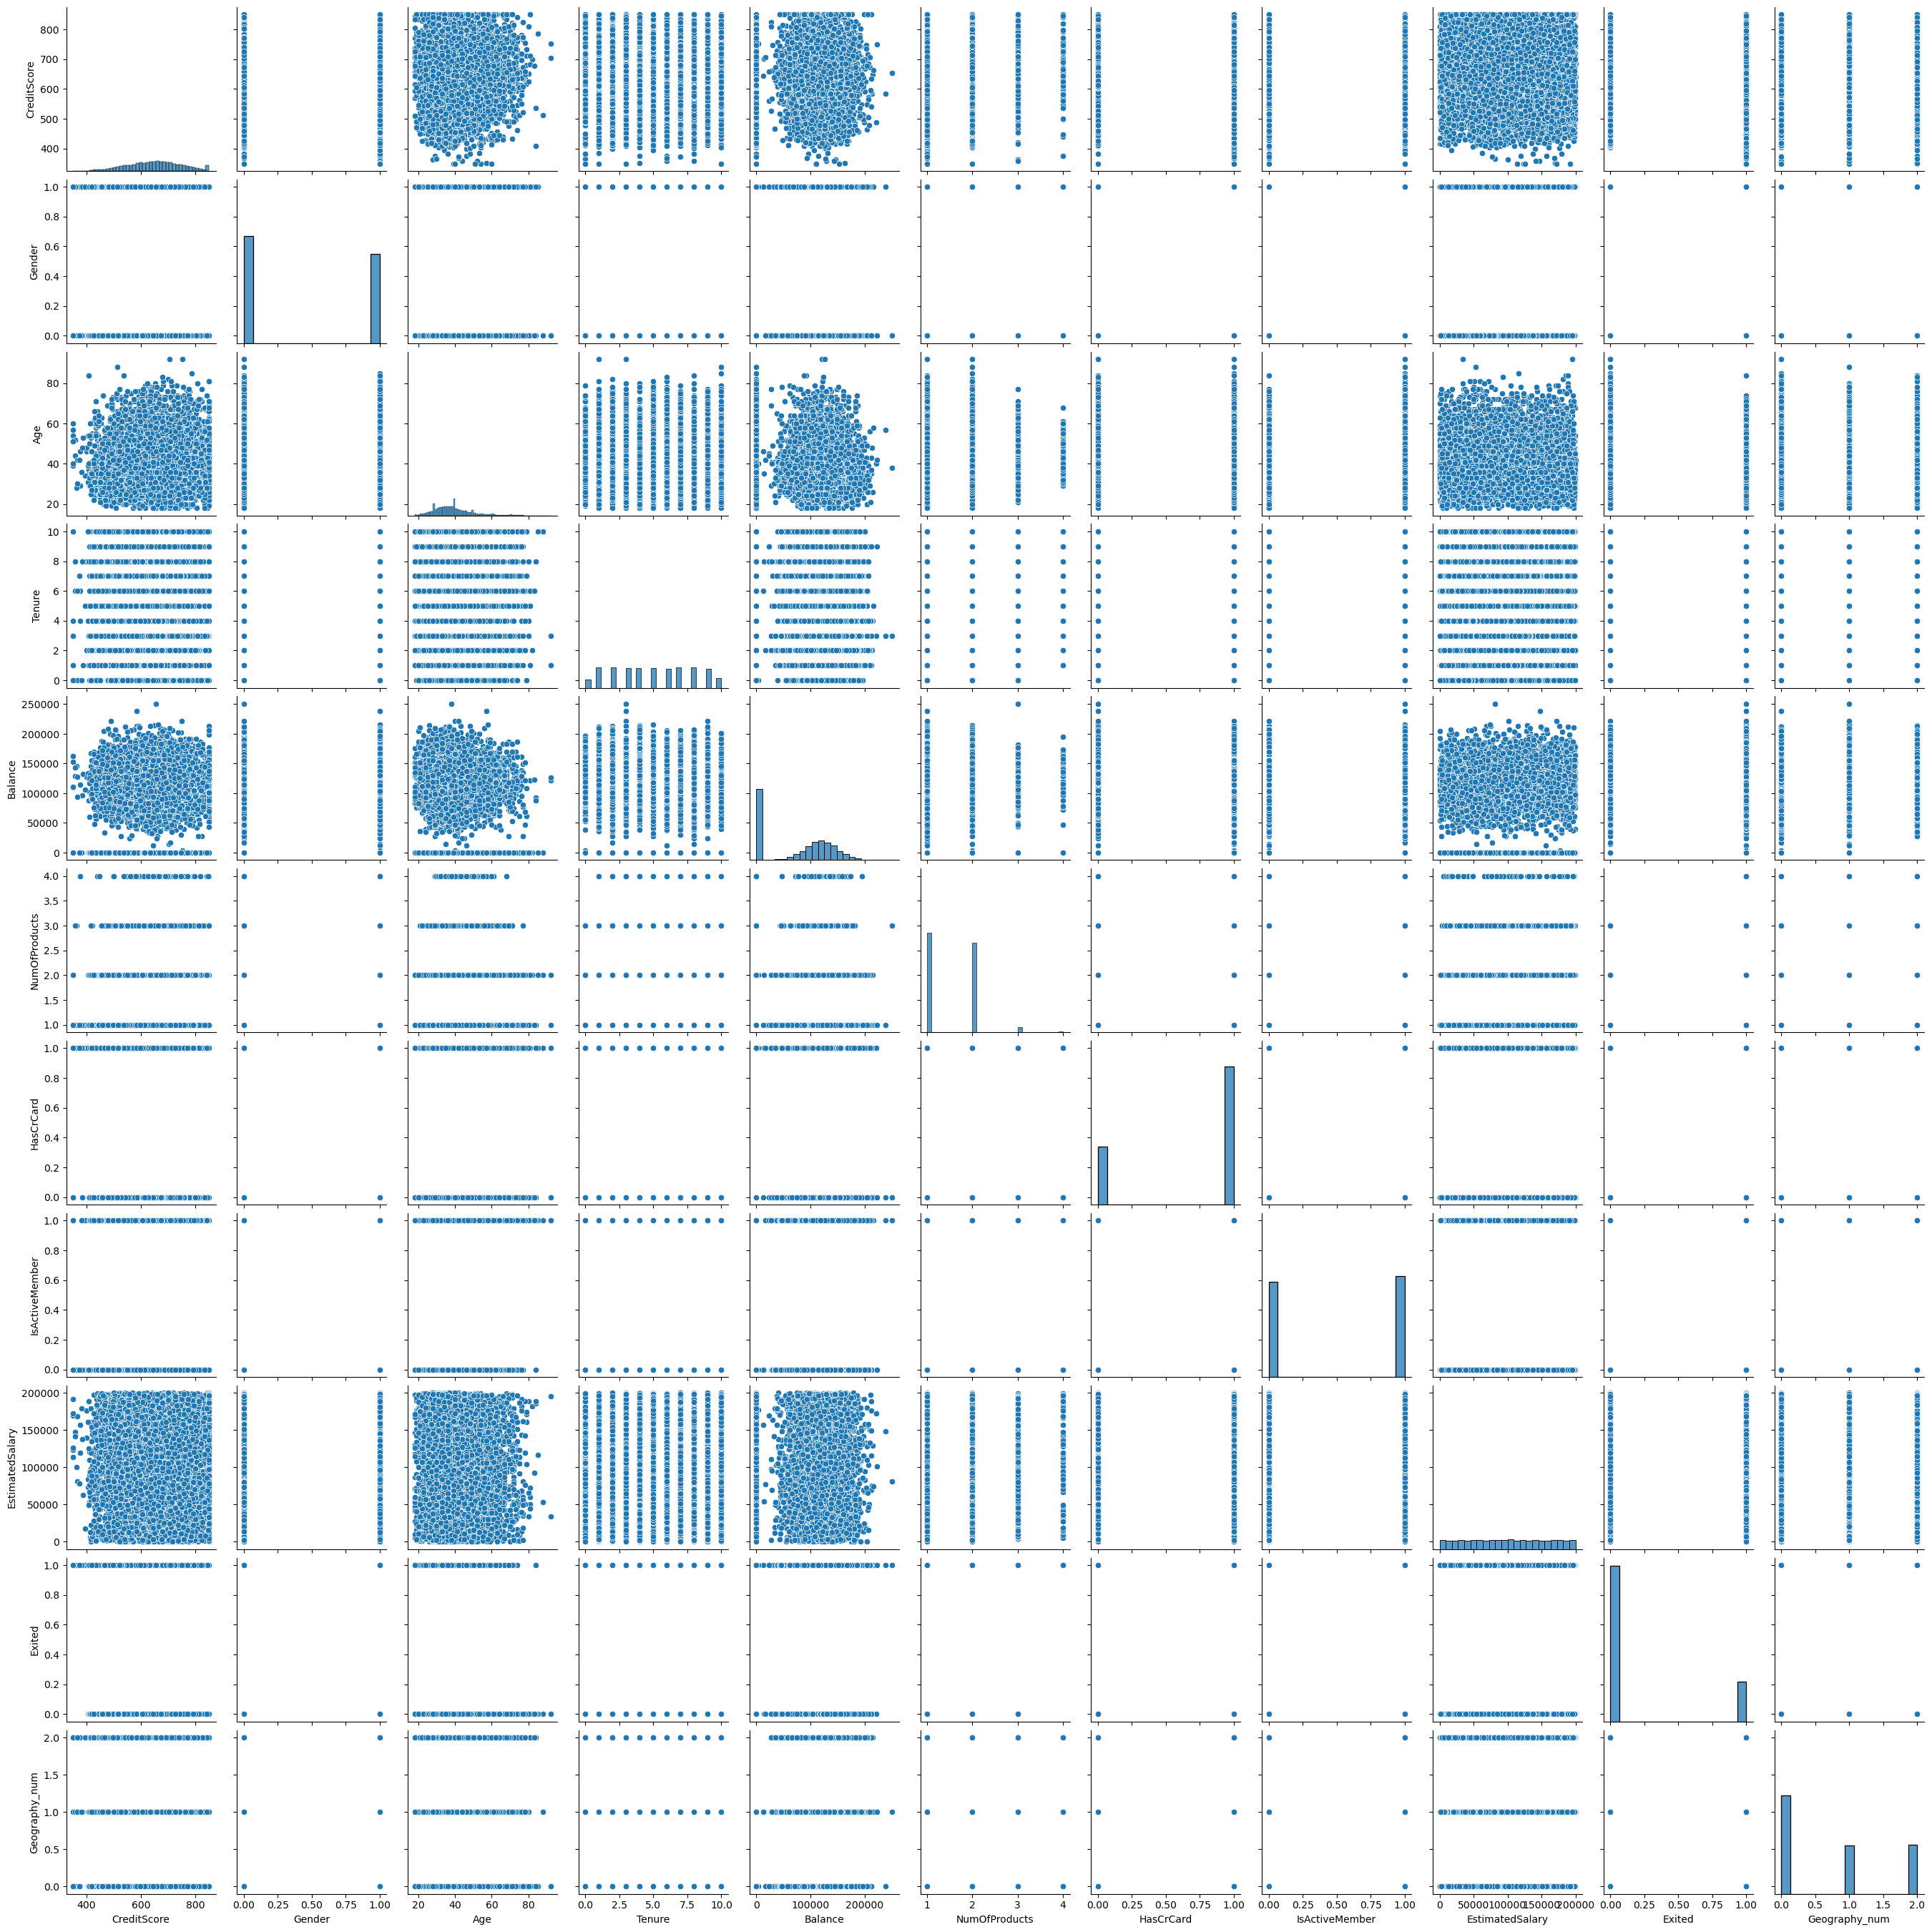

In [97]:
sns.pairplot(df[features_eda])

## Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
- удаление выбросов
- заполнение пропусков
- нормализация (масштабирование) числовых признаков
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

In [98]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1


In [116]:
df.to_csv('analyzed_churn_modelling.csv', index=False)